In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
%matplotlib inline

In [45]:
df = pd.read_csv("economic_index.csv.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1463
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [46]:
df.drop(["Unnamed: 0","year","month"],axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1463
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [47]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.938648
unemployment_rate,-0.925814,1.000000,-0.934142
index_price,0.938648,-0.934142,1.000000


C:\Users\Nags\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Nags\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Nags\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



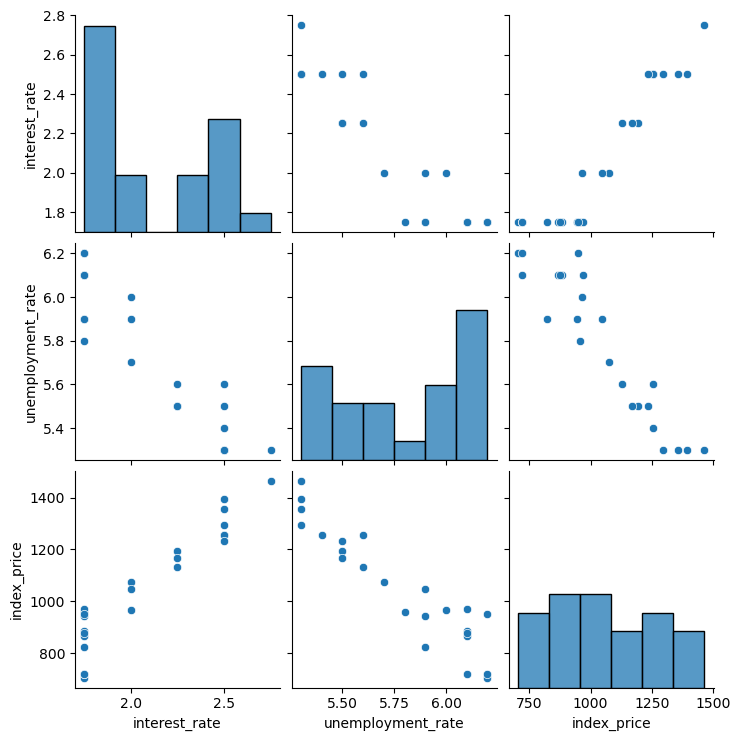

In [48]:
sns.pairplot(df)

In [49]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [50]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [51]:
y

0     1463
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1167
9     1130
10    1075
11    1047
12     965
13     943
14     958
15     971
16     949
17     884
18     866
19     876
20     822
21     704
22     719
23     719
Name: index_price, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

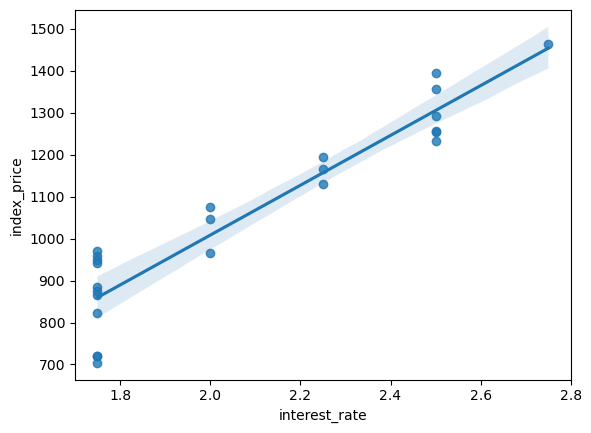

In [58]:
sns.regplot(df,x="interest_rate",y="index_price")

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

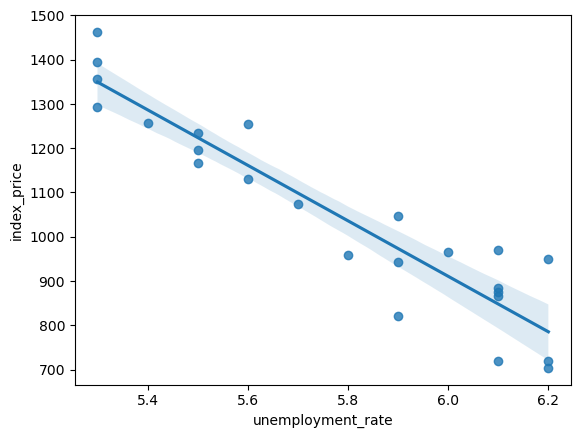

In [59]:
sns.regplot(df,x="unemployment_rate",y="index_price")

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

## Cross validation

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
cross_validation = cross_val_score(regression,x_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [64]:
cross_validation

array([-4066.17374941, -8905.19516235, -2733.39794622])

In [65]:
np.mean(cross_validation)

-5234.922285993515

#### prediction

In [66]:
y_pred = regression.predict(x_test)

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6774.234936736218
67.09498827994202
82.30574060620691


In [69]:
# R^2
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.8130758529252803

In [73]:
# Adjusted R^2
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6884597548754672

### Assumptions

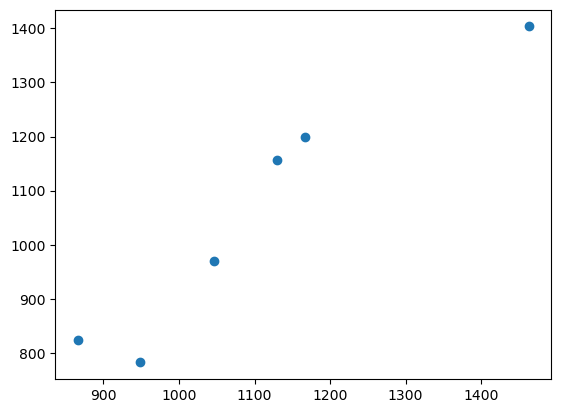

In [75]:
plt.scatter(y_test,y_pred)

In [76]:
residuals = y_test - y_pred
print(residuals)

8     -31.456357
16    166.403114
0      59.674796
18     41.204989
11     77.572441
9     -26.258232
Name: index_price, dtype: float64


C:\Users\Nags\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



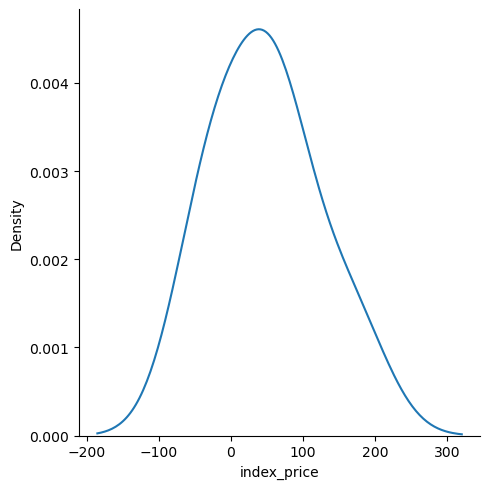

In [77]:
sns.displot(residuals,kind='kde')

In [78]:
import statsmodels.api as sm

In [82]:
model = sm.OLS(Y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[18.57943925 13.27102804]


In [83]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.190
Method:                 Least Squares   F-statistic:                            0.04279
Date:                Sun, 07 Jul 2024   Prob (F-statistic):                       0.844
Time:                        20:47:32   Log-Likelihood:                         -39.376
No. Observations:                   6   AIC:                                      80.75
Df Residuals:                       5   BIC:                                      80.54
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Nags\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



In [84]:
regression.coef_

array([  81.69752557, -136.05255074])